In [522]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [523]:
zill_oh=pd.read_csv(Path("Zill_OH.csv"), 
                    na_values=['#VALUE!', '#DIV/0!'])


In [524]:
zill_oh.head()

,RegionID,SizeRank,RegionName,State,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2015,2015.1,2016,2017,2018,2019,2020
0,2241,28,Cuyahoga County,OH,123265.6667,128272.0000,131661.5208,136091.5834,141406.2500,145568.3334,...,109456.7500,102880.16670,106290.58330,104775.7500,109667.58330,113702.00000,121977.0000,131489.3334,138068.6667,148544.1667
1,2288,32,Franklin County,OH,125684.7500,131004.8333,136264.0834,142590.0000,147347.3334,152353.2500,...,131124.3333,123863.66670,127560.08340,134766.9167,143234.00000,153052.50000,167816.4167,181285.3333,195054.6667,211500.4167
2,2322,67,Hamilton County,OH,123741.2500,130025.7500,135106.4792,140923.0833,145550.1667,149538.3334,...,126820.7500,122031.16670,123795.83330,124854.2500,129725.00000,134761.33340,146044.4167,154671.1667,165390.0834,178854.1667
3,1404,113,Summit County,OH,115352.7500,119571.4167,122358.0208,126877.9167,131231.6667,134318.8333,...,115457.7500,111183.83330,115679.83330,115613.1667,117046.16670,120845.50000,128407.2500,136196.9167,143800.3334,153471.6667
4,2980,117,Montgomery County,OH,100228.3333,103698.7500,106798.1875,109697.8333,113251.8333,117527.2500,...,97023.5000,91541.33333,91103.33333,91472.0000,90092.66667,94826.83333,100494.3333,108871.5000,115480.6667,127337.4167


In [525]:
#zill_oh.describe()

In [526]:
#ax=zill_oh.plot(colormap='Dark2',figsize=(14,7))

In [527]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
    rolmean= pd.Series(timeseries).rolling(window=60).mean()
    rolstd = pd.Series(timeseries).rolling(window=60).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ("Results of Dickey-Fuller Test")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [528]:
zill_OHIO=zill_oh.T.drop(
  [
    'RegionID', 
    'SizeRank', 
  ]
).T.rename(columns={'RegionName': 'County Name'})

In [529]:
zill_OHIO.describe()

,County Name,State,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2015,2015.1,2016,2017,2018,2019,2020
count,88,88,68.0000,68.00,68.0000,68.0000,68.00000,78.0000,80.00000,80.00000,...,84.0000,85.0000,85.0000,86.0000,88.0000,88.0,88.0000,88.0,88.0,88.00
unique,88,1,68.0000,68.00,68.0000,68.0000,68.00000,78.0000,80.00000,80.00000,...,84.0000,85.0000,85.0000,86.0000,88.0000,88.0,88.0000,88.0,88.0,88.00
top,Monroe County,OH,123265.6667,136961.25,91264.6875,109697.8333,87937.83333,141699.6667,97922.58333,77082.16667,...,172005.9167,190592.6667,106165.6667,150913.0833,121344.6667,112001.5,124881.8333,118095.5,337283.0,109312.25
freq,1,88,1.0000,1.00,1.0000,1.0000,1.00000,1.0000,1.00000,1.00000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.00


In [530]:
#zill_OHIO.set_index(['County Name', 'State'], inplace=True)

In [531]:
zill_OHIO

,County Name,State,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2015,2015.1,2016,2017,2018,2019,2020
0,Cuyahoga County,OH,123265.6667,128272.0,131661.5208,136091.5834,141406.25,145568.3334,147510.9167,140873.3333,...,109456.75,102880.1667,106290.5833,104775.75,109667.5833,113702.0,121977.0,131489.3334,138068.6667,148544.1667
1,Franklin County,OH,125684.75,131004.8333,136264.0834,142590.0,147347.3334,152353.25,154951.5834,152760.0833,...,131124.3333,123863.6667,127560.0834,134766.9167,143234.0,153052.5,167816.4167,181285.3333,195054.6667,211500.4167
2,Hamilton County,OH,123741.25,130025.75,135106.4792,140923.0833,145550.1667,149538.3334,152715.25,150889.4167,...,126820.75,122031.1667,123795.8333,124854.25,129725.0,134761.3334,146044.4167,154671.1667,165390.0834,178854.1667
3,Summit County,OH,115352.75,119571.4167,122358.0208,126877.9167,131231.6667,134318.8333,136080.5,134748.4167,...,115457.75,111183.8333,115679.8333,115613.1667,117046.1667,120845.5,128407.25,136196.9167,143800.3334,153471.6667
4,Montgomery County,OH,100228.3333,103698.75,106798.1875,109697.8333,113251.8333,117527.25,119325.5,118524.0834,...,97023.5,91541.33333,91103.33333,91472.0,90092.66667,94826.83333,100494.3333,108871.5,115480.6667,127337.4167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Harrison County,OH,59154.91667,63654.25,66502.625,70320.41667,74350.0,70305.41667,64884.16667,64362.83334,...,62731.08333,62480.33334,63041.25,65475.58333,69294.83333,74163.41667,78675.75,84418.75,90699.08333,94883.33333
84,Morgan County,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66408.66667,65896.33333,67551.25,71270.25,75308.33333,81636.25,85754.75,88326.58334,94986.5,100349.25
85,Noble County,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116793.6667,111670.25,113727.4167,118095.5,122763.1667,124012.8333
86,Monroe County,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98418.66666,93291.83334,96704.25,104138.0833,106722.75,109723.0834


In [532]:
zill_OHIO.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
83     0
84     9
85    15
86    15
87    12
Length: 88, dtype: int64

In [533]:
column_means = zill_OHIO.median()
zill_OHIO_up = zill_OHIO.fillna(column_means)


In [534]:
zill_OHIO_up

,County Name,State,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2015,2015.1,2016,2017,2018,2019,2020
0,Cuyahoga County,OH,123265.66670,128272.000000,131661.5208,136091.58340,141406.25000,145568.33340,147510.91670,140873.33330,...,109456.75000,102880.16670,106290.58330,104775.750000,109667.58330,113702.00000,121977.00000,131489.33340,138068.66670,148544.16670
1,Franklin County,OH,125684.75000,131004.833300,136264.0834,142590.00000,147347.33340,152353.25000,154951.58340,152760.08330,...,131124.33330,123863.66670,127560.08340,134766.916700,143234.00000,153052.50000,167816.41670,181285.33330,195054.66670,211500.41670
2,Hamilton County,OH,123741.25000,130025.750000,135106.4792,140923.08330,145550.16670,149538.33340,152715.25000,150889.41670,...,126820.75000,122031.16670,123795.83330,124854.250000,129725.00000,134761.33340,146044.41670,154671.16670,165390.08340,178854.16670
3,Summit County,OH,115352.75000,119571.416700,122358.0208,126877.91670,131231.66670,134318.83330,136080.50000,134748.41670,...,115457.75000,111183.83330,115679.83330,115613.166700,117046.16670,120845.50000,128407.25000,136196.91670,143800.33340,153471.66670
4,Montgomery County,OH,100228.33330,103698.750000,106798.1875,109697.83330,113251.83330,117527.25000,119325.50000,118524.08340,...,97023.50000,91541.33333,91103.33333,91472.000000,90092.66667,94826.83333,100494.33330,108871.50000,115480.66670,127337.41670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Harrison County,OH,59154.91667,63654.250000,66502.6250,70320.41667,74350.00000,70305.41667,64884.16667,64362.83334,...,62731.08333,62480.33334,63041.25000,65475.583330,69294.83333,74163.41667,78675.75000,84418.75000,90699.08333,94883.33333
84,Morgan County,OH,95050.87500,99848.458315,102808.9896,105108.58335,106296.83335,107152.04170,109499.79170,109875.79170,...,66408.66667,65896.33333,67551.25000,71270.250000,75308.33333,81636.25000,85754.75000,88326.58334,94986.50000,100349.25000
85,Noble County,OH,95050.87500,99848.458315,102808.9896,105108.58335,106296.83335,107152.04170,109499.79170,109875.79170,...,98608.79167,96540.33333,97678.16667,100216.249995,116793.66670,111670.25000,113727.41670,118095.50000,122763.16670,124012.83330
86,Monroe County,OH,95050.87500,99848.458315,102808.9896,105108.58335,106296.83335,107152.04170,109499.79170,109875.79170,...,98608.79167,96540.33333,97678.16667,100216.249995,98418.66666,93291.83334,96704.25000,104138.08330,106722.75000,109723.08340


In [535]:
zill_OHIO_up.to_csv(r"Zill_OH_1.csv")

In [536]:
zill_OHIO_tr=zill_OHIO_up.T

In [537]:
#zill_OHIO_tr.set_index(,inplace=True)

In [538]:
zill_holmes=pd.read_csv(Path("Holmes.csv"),index_col='Year',parse_dates=True)


In [539]:
zill_holmes.dropna(inplace=True)


In [540]:
zill_holmes

,Price Change PCT,Unemployment,HPI,Subprime PCT,Burdened Households
Year,,,,,
2000-01-01,4.23,3.0,220.0300,24.94501602,20.340000
2001-01-01,5.45,2.9,231.7625,24.91195932,20.110000
2002-01-01,4.22,3.1,239.6500,24.68784285,21.314500
2003-01-01,4.04,3.2,247.3775,25.72984392,22.670000
2004-01-01,4.55,3.0,256.2075,26.47236407,21.067000
2005-01-01,5.28,3.1,265.3025,25.38290915,22.650100
2006-01-01,-0.01,2.9,236.5325,24.59914059,24.111450
2007-01-01,-0.08,3.5,220.2150,23.74748875,25.301123
2008-01-01,-0.68,7.0,198.4325,23.2995874,25.233500


In [541]:
holmes_corr=zill_holmes.corr()

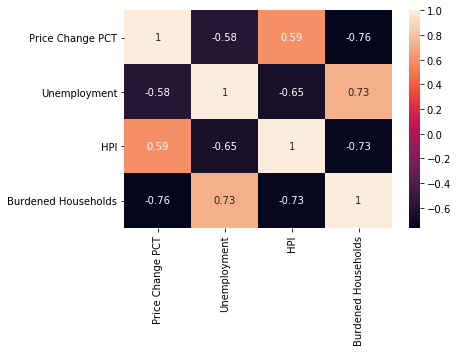

In [542]:
sn.heatmap(holmes_corr, annot=True)
plt.show()

In [543]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [544]:
X = holmes_corr.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,Unemployment,15.021280
1,HPI,15.884303
2,Burdened Households,23.797257


In [545]:
holmes_price_ts=pd.read_csv(Path("Holmes_Price.csv"),parse_dates=True)

In [546]:
holmes_price_ts

,Dates,Price
0,5/31/98,95523
1,6/30/98,96348
2,7/31/98,97102
3,8/31/98,98399
4,9/30/98,100011
...,...,...
271,12/31/20,222943
272,1/31/21,225660
273,2/28/21,228274
274,3/31/21,231338


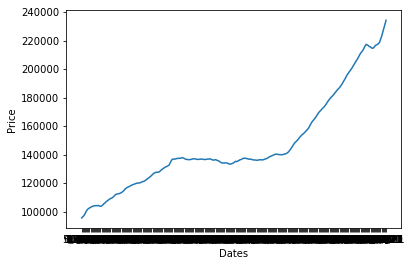

In [547]:
sn.lineplot(data=holmes_price_ts, x="Dates", y="Price")

In [548]:
holmes_price_ts["pct"]=holmes_price_ts['Price'].pct_change()

In [549]:
holmes_price_ts

,Dates,Price,pct
0,5/31/98,95523,NaN
1,6/30/98,96348,0.008637
2,7/31/98,97102,0.007826
3,8/31/98,98399,0.013357
4,9/30/98,100011,0.016382
...,...,...,...
271,12/31/20,222943,0.010323
272,1/31/21,225660,0.012187
273,2/28/21,228274,0.011584
274,3/31/21,231338,0.013422


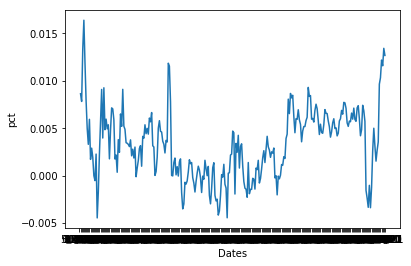

In [550]:
sn.lineplot(data=holmes_price_ts, x="Dates", y="pct")

In [551]:
holmes_price_ts.set_index('Dates', inplace=True)

In [552]:
holmes_price_ts

,Price,pct
Dates,,
5/31/98,95523,NaN
6/30/98,96348,0.008637
7/31/98,97102,0.007826
8/31/98,98399,0.013357
9/30/98,100011,0.016382
...,...,...
12/31/20,222943,0.010323
1/31/21,225660,0.012187
2/28/21,228274,0.011584


In [553]:
ts=holmes_price_ts.iloc[1:,1]

In [554]:
ts

Dates
6/30/98     0.008637
7/31/98     0.007826
8/31/98     0.013357
9/30/98     0.016382
10/31/98    0.011899
              ...   
12/31/20    0.010323
1/31/21     0.012187
2/28/21     0.011584
3/31/21     0.013422
4/30/21     0.012674
Name: pct, Length: 275, dtype: float64

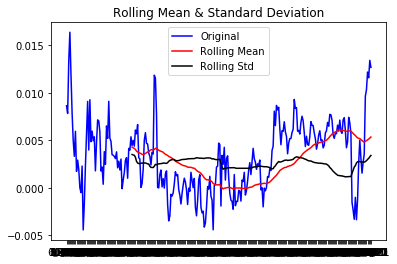

Results of Dickey-Fuller Test
Test Statistic                  -1.353754
p-value                          0.604236
#Lags Used                      15.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


In [555]:
test_stationarity(ts)